Please revise classes and objects from the given python playlist as they are necessary to understand this notebook

## Graph Representation in .py

A Graph consists of a set of vertices(V) and a set of edges(E). We can denote it as G(V, E).

A graph can be stored in two ways :

 - Adjacency Matrix
 - Adjacency Lists

## Adjacency Matrix Implementation

An adjacency matrix is a 2D array of size $𝑉×V$, where $𝑉$ is the number of vertices in the graph. Each cell $𝑀[𝑖][𝑗]$ in the matrix represents the presence or absence of an edge between vertices $𝑖$ and $𝑗$ .

- Suitable for dense graphs with many edges.

- Requires 𝑂(𝑉^2) space, where 𝑉 is the number of vertices.

- Checking for the presence of an edge takes constant time (𝑂(1)).


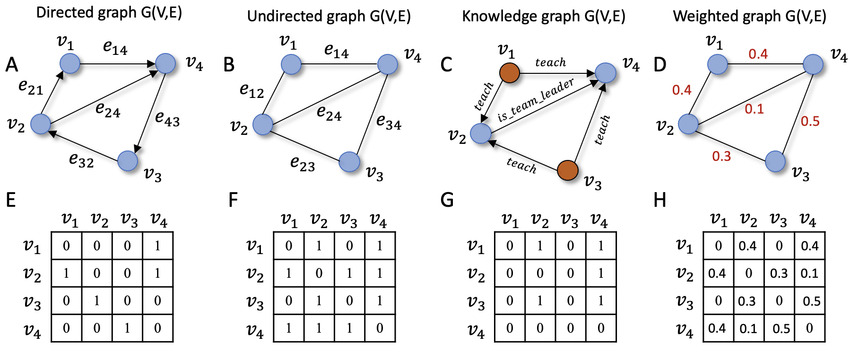

As you can see all the adjacency matrix representation of various types of graphs in the above image (knowledge graph can be considered directed + unweighted)

In [1]:
class AjM_Graph:
  # Adjacency Matrix Graph class
  # Supports:
  # - Directed / Undirected
  # - Weighted / Unweighted

    def __init__(self, vertices, directed=False, weighted=False):
        self.V = vertices
        self.directed = directed
        self.weighted = weighted

        # Initialize adjacency matrix with 0 (means no edge)
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)] #Matrix

    def add_edge(self, u, v, weight=1):
        if self.weighted:
            self.graph[u][v] = weight
        else:
            self.graph[u][v] = 1

        # Mirror edge if graph is undirected
        if not self.directed:
            if self.weighted:
                self.graph[v][u] = weight
            else:
                self.graph[v][u] = 1

    def remove_edge(self, u, v):
        self.graph[u][v] = 0
        if not self.directed:
            self.graph[v][u] = 0

**Examples**

In [2]:
g = AjM_Graph(5)   # unidirected unweighted Graph with 5 vertices: 0,1,2,3,4
#use add_edge(u, v) to connect vertex u and v
g.add_edge(0, 1)
g.add_edge(0, 4)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 3)
g.add_edge(3, 4)

print(g.graph) # Adj. Matrix

[[0, 1, 0, 0, 1], [1, 0, 1, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 0, 1], [1, 1, 0, 1, 0]]


In [3]:
g.remove_edge(3,4)
g.remove_edge(0,1)
g.remove_edge(1,3)
print(g.graph) # to remove any edge

[[0, 0, 0, 0, 1], [0, 0, 1, 0, 1], [0, 1, 0, 1, 0], [0, 0, 1, 0, 0], [1, 1, 0, 0, 0]]


In [4]:
g1 = AjM_Graph(5,weighted = True)   # unidirected weighted Graph with 5 vertices: 0,1,2,3,4
#use add_edge(u, v) to connect vertex u and v with weights
g1.add_edge(0, 1, 2)
g1.add_edge(0, 4, 3)
g1.add_edge(1, 2, 5)
g1.add_edge(1, 3, 0.5)
g1.add_edge(1, 4, 1)
g1.add_edge(2, 3, 1)
g1.add_edge(3, 4, 7)

print(g1.graph) # Adj. Matrix

[[0, 2, 0, 0, 3], [2, 0, 5, 0.5, 1], [0, 5, 0, 1, 0], [0, 0.5, 1, 0, 7], [3, 1, 0, 7, 0]]


In [5]:
g2 = AjM_Graph(5,directed = True ,weighted = True)   # directed weighted Graph with 5 vertices: 0,1,2,3,4
#use add_edge(u, v) to connect vertex u and v with weights
g2.add_edge(0, 1, 2)
g2.add_edge(0, 4, 3)
g2.add_edge(1, 2, 5)
g2.add_edge(2, 1, 3)
g2.add_edge(1, 3, 0.5)
g2.add_edge(1, 4, 1)
g2.add_edge(2, 3, 1)
g2.add_edge(3, 4, 7)

print(g2.graph) # Adj. Matrix

[[0, 2, 0, 0, 3], [0, 0, 5, 0.5, 1], [0, 3, 0, 1, 0], [0, 0, 0, 0, 7], [0, 0, 0, 0, 0]]


## Adjacency List Implementation

An adjacency list represents a graph as an array of lists. The size of the array is equal to the number of vertices. Each element of the array is a list that contains the neighbors of a vertex.

- Suitable for sparse graphs with few edges.

- Requires 𝑂(𝑉+𝐸) space, where 𝐸 is the number of edges.

- Consumes less memory for sparse graphs.

- Accessing neighbors of a vertex is faster.





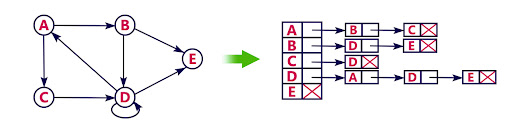

In [6]:
class AjL_Graph:
    def __init__(self, vertices, directed=False, weighted=False):
        self.V = vertices
        self.directed = directed
        self.weighted = weighted
        self.graph = [[] for _ in range(self.V)] #Array of lists

    def add_edge(self, u, v, weight=1):
        if self.weighted:
            self.graph[u].append((v, weight))
        else:
            self.graph[u].append(v)

        if not self.directed:
            if self.weighted:
                self.graph[v].append((u, weight))
            else:
                self.graph[v].append(u)

    def remove_edge(self, u, v):
        if self.weighted:
            self.graph[u] = [(x, w) for (x, w) in self.graph[u] if x != v]
        else:
            self.graph[u] = [x for x in self.graph[u] if x != v]

        if not self.directed:
            if self.weighted:
                self.graph[v] = [(x, w) for (x, w) in self.graph[v] if x != u]
            else:
                self.graph[v] = [x for x in self.graph[v] if x != u]


**Examples**

In [7]:
g3 = AjL_Graph(5)   # unidirected unweighted Graph with 5 vertices: 0,1,2,3,4
#use add_edge(u, v) to connect vertex u and v
g3.add_edge(0, 1)
g3.add_edge(0, 4)
g3.add_edge(1, 2)
g3.add_edge(1, 3)
g3.add_edge(1, 4)
g3.add_edge(2, 3)
g3.add_edge(3, 4)

print(g3.graph) # Adj. List

[[1, 4], [0, 2, 3, 4], [1, 3], [1, 2, 4], [0, 1, 3]]


In [8]:
g4 = AjL_Graph(5,directed = True,weighted = True)   # directed weighted Graph with 5 vertices: 0,1,2,3,4
#use add_edge(u, v) to connect vertex u and v with weights
g4.add_edge(0, 1, 2)
g4.add_edge(0, 4, 3)
g4.add_edge(1, 2, 5)
g4.add_edge(1, 3, 0.5)
g4.add_edge(1, 4, 1)
g4.add_edge(2, 3, 1)
g4.add_edge(3, 4, 7)

print(g4.graph) # Adj. List

[[(1, 2), (4, 3)], [(2, 5), (3, 0.5), (4, 1)], [(3, 1)], [(4, 7)], []]


## Depth First Search Implementation (using adj_matrix)
DFS explores as far as possible along each branch before backtracking. It can be implemented recursively or using a stack.

In [9]:
class AjM_Graph_dfs: #same graph class as above but with extra dfs function
  # Adjacency Matrix Graph class
  # Supports:
  # - Directed / Undirected
  # - Weighted / Unweighted

    def __init__(self, vertices, directed=False, weighted=False):
        self.V = vertices
        self.directed = directed
        self.weighted = weighted

        # Initialize adjacency matrix with 0 (means no edge)
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)] #Matrix

    def add_edge(self, u, v, weight=1):
        if self.weighted:
            self.graph[u][v] = weight
        else:
            self.graph[u][v] = 1

        # Mirror edge if graph is undirected
        if not self.directed:
            if self.weighted:
                self.graph[v][u] = weight
            else:
                self.graph[v][u] = 1

    def remove_edge(self, u, v):
        self.graph[u][v] = 0
        if not self.directed:
            self.graph[v][u] = 0

    def dfs(self, v, visited): # added extra recursive dfs function which starts at source vertex v
        visited[v] = True
        print(v, end=" ")

        for i in range(self.V):
            if self.graph[v][i] != 0 and not visited[i]:
                self.dfs(i, visited)

In [10]:
g5 = AjM_Graph_dfs(6)
g5.add_edge(0, 1)
g5.add_edge(0, 2)
g5.add_edge(1, 2)
g5.add_edge(1, 3)
g5.add_edge(3, 4)
g5.add_edge(2, 5)

# Function call
print("DFS traversal starting from node 1 for undirected graph")
g5.dfs(1,[False]*6) # requires starting node (1 here) and initial visited array (all terms False) as input

DFS traversal starting from node 1 for undirected graph
1 0 2 5 3 4 

In [11]:
g6 = AjM_Graph_dfs(6,directed = True)
g6.add_edge(0, 1)
g6.add_edge(0, 2)
g6.add_edge(1, 2)
g6.add_edge(1, 3)
g6.add_edge(3, 4)
g6.add_edge(2, 5)

# Function call
print("DFS traversal starting from node 1 for directed graph")
g6.dfs(1,[False]*6) # requires starting node (1 here) and initial visited array (all terms False) as input

DFS traversal starting from node 1 for directed graph
1 2 5 3 4 

## Breadth First Search Implementation (using adj_matrix)

BFS explores all the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level. It can be implemented using a queue.

In [12]:
class AjM_Graph_bfs:
  # Adjacency Matrix Graph class
  # Supports:
  # - Directed / Undirected
  # - Weighted / Unweighted

    def __init__(self, vertices, directed=False, weighted=False):
        self.V = vertices
        self.directed = directed
        self.weighted = weighted

        # Initialize adjacency matrix with 0 (means no edge)
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)] #Matrix

    def add_edge(self, u, v, weight=1):
        if self.weighted:
            self.graph[u][v] = weight
        else:
            self.graph[u][v] = 1

        # Mirror edge if graph is undirected
        if not self.directed:
            if self.weighted:
                self.graph[v][u] = weight
            else:
                self.graph[v][u] = 1

    def remove_edge(self, u, v):
        self.graph[u][v] = 0
        if not self.directed:
            self.graph[v][u] = 0

    def bfs(self, start):
        visited = [False] * self.V
        queue = []

        queue.append(start)
        visited[start] = True

        while queue:
            current = queue.pop(0)
            print(current, end=" ")

            for i in range(self.V):
                if self.graph[current][i] != 0 and not visited[i]:
                    queue.append(i)
                    visited[i] = True

In [13]:
g7 = AjM_Graph_bfs(6)
g7.add_edge(0, 1)
g7.add_edge(0, 2)
g7.add_edge(1, 2)
g7.add_edge(1, 3)
g7.add_edge(3, 4)
g7.add_edge(2, 5)

print("\nBreadth First Traversal: starting from node 2")
g7.bfs(2)


Breadth First Traversal: starting from node 2
2 0 1 5 3 4 

In [14]:
g8 = AjM_Graph_bfs(6, directed = True)
g8.add_edge(0, 1)
g8.add_edge(0, 2)
g8.add_edge(1, 2)
g8.add_edge(1, 3)
g8.add_edge(3, 4)
g8.add_edge(2, 5)

print("\nBreadth First Traversal: starting from node 2")
g8.bfs(2)


Breadth First Traversal: starting from node 2
2 5 

## ->  for Practice implement DFS and BFS using Adj_list

## Dijkstra Implementation

The algorithm uses a **priority queue** to maintain the order of nodes to visit and updates the distance of nodes as they are visited.

Remember always extend the path that currently has the smallest total cost.

In [15]:
# shortest path in weighted graph
# We will use the same graph class for adjacency matrix that we used above and add some extra functions for implementation
class AjM_Graph_Dijkstra:

    def __init__(self, vertices, directed=False, weighted=False):
        self.V = vertices
        self.directed = directed
        self.weighted = weighted

        # Initialize adjacency matrix with 0 (means no edge)
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)] #Matrix

    def add_edge(self, u, v, weight=1):
        if self.weighted:
            self.graph[u][v] = weight
        else:
            self.graph[u][v] = 1

        # Mirror edge if graph is undirected
        if not self.directed:
            if self.weighted:
                self.graph[v][u] = weight
            else:
                self.graph[v][u] = 1

    def remove_edge(self, u, v):
        self.graph[u][v] = 0
        if not self.directed:
            self.graph[v][u] = 0


    def printSolution(self, dist):
        print("Vertex \t Shortest Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])

   # dist stores the shortest distance found so far from src to vertex v
   # sptSet It tells whether the shortest distance to a vertex is FINALIZED or NOT (same as visited array in traversals)
    def minDistance(self, dist, sptSet): # function to pick next vertex
        # The closest unvisited vertex must be finalized next
        # Initialize minimum distance for next node
        min = 1e7

        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v

        return min_index

    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
        # initialization
        dist = [1e7] * self.V #unknown distances initialized as infinity (10^7)
        dist[src] = 0 # distance at start from source which is 0
        sptSet = [False] * self.V # visited array (initially all false)

        for cout in range(self.V):

            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)

            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]

        self.printSolution(dist)

### graph plot code

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

#code to plot graph if adjacency matrix is given
def is_directed(graph):
    V = len(graph)
    for i in range(V):
        for j in range(V):
            if graph[i][j] != graph[j][i]:
                return True
    return False

def plot_adj_matrix(graph):
    V = len(graph)

    # Detect directed graph from matrix symmetry
    directed = False
    for i in range(V):
        for j in range(V):
            if graph[i][j] != graph[j][i]:
                directed = True
                break
        if directed:
            break

    # Place nodes on a circle
    pos = {}
    for i in range(V):
        angle = 2 * math.pi * i / V
        pos[i] = (math.cos(angle), math.sin(angle))

    # Plot nodes
    for i, (x, y) in pos.items():
        plt.scatter(x, y, zorder=3)
        plt.text(x, y + 0.08, str(i), ha='center', fontsize=12)

    # Plot edges
    for i in range(V):
        for j in range(V):
            if graph[i][j] != 0:

                # Skip duplicate undirected edges
                if not directed and j < i:
                    continue

                x1, y1 = pos[i]
                x2, y2 = pos[j]

                if directed:
                    # Offset if reverse edge exists
                    dx = x2 - x1
                    dy = y2 - y1
                    dist = math.sqrt(dx*dx + dy*dy)

                    offset = 0.025
                    ox = -dy / dist * offset
                    oy = dx / dist * offset

                    if graph[j][i] != 0:   # bidirectional edge
                        x1 += ox
                        y1 += oy
                        x2 += ox
                        y2 += oy

                    plt.annotate(
                        "",
                        xy=(x2, y2),
                        xytext=(x1, y1),
                        arrowprops=dict(arrowstyle="->", lw=1.5),
                    )
                else:
                    plt.plot([x1, x2], [y1, y2])

                # Weight label
                mx = (x1 + x2) / 2
                my = (y1 + y2) / 2
                plt.text(mx, my, str(graph[i][j]), fontsize=10)

    plt.axis("off")
    title = "Directed Graph (bidirectional edges visible)" if directed else "Undirected Graph"
    plt.title(title)
    plt.show()

### Examples

[[0, 3, 2, 0, 0], [3, 0, 3, 4, 2], [2, 3, 0, 0, 3], [0, 4, 0, 0, 0], [0, 2, 3, 0, 0]]
Vertex 	 Shortest Distance from Source
0 		 0
1 		 3
2 		 2
3 		 7
4 		 5


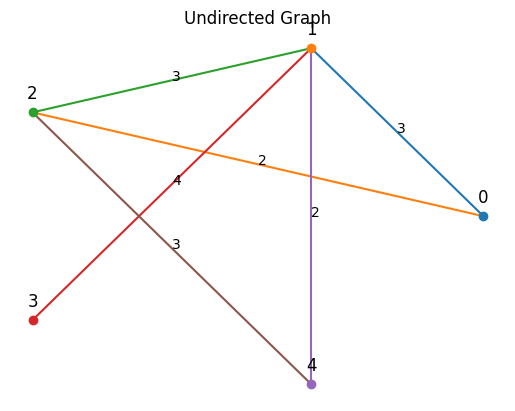

In [17]:
G = AjM_Graph_Dijkstra(5,weighted = True)
G.add_edge(0, 1, 3)
G.add_edge(0, 2, 2)
G.add_edge(1, 2, 3)
G.add_edge(1, 3, 4)
G.add_edge(1, 4, 2)
G.add_edge(2, 4, 3)

print(G.graph)
G.dijkstra(0)
G_matrix = np.array(G.graph)
plot_adj_matrix(G_matrix)

[[0, 3, 2, 0, 0], [1, 0, 3, 1, 2], [7, 0, 0, 0, 3], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
Vertex 	 Shortest Distance from Source
0 		 7
1 		 10
2 		 0
3 		 11
4 		 3


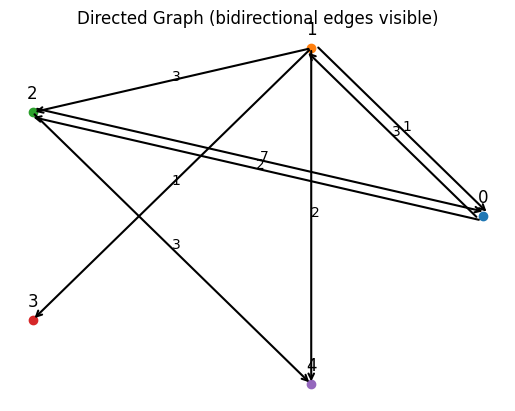

In [18]:
G1 = AjM_Graph_Dijkstra(5,directed = True,weighted = True)
G1.add_edge(0, 1, 3)
G1.add_edge(1, 0, 1)
G1.add_edge(0, 2, 2)
G1.add_edge(2, 0, 7)
G1.add_edge(1, 2, 3)
G1.add_edge(1, 3, 1)
G1.add_edge(1, 4, 2)
G1.add_edge(2, 4, 3)

print(G1.graph)
G1.dijkstra(2)
G1_matrix = np.array(G1.graph)
plot_adj_matrix(G1_matrix)

The above code will give error when any two nodes aren't connected. So, make sure to use a fully connected graph.

## Visualization using matplotlib

A 2-D grid can be considered a graph with each point (i,j) as a node with each edge of unit distance (weight = 1). points with obstacles are removed from the graph. For simplicity we are considering movements in 4 & 8 directions only :

(1,0), (-1,0), (0,1), (0,-1) from source point (currently (0,0)) with weight  = 1 for all edges

(1,0), (-1,0), (0,1), (0,-1), (1,1), (1,-1), (-1,1), (-1,-1)  from source point (currently (0,0)) with weights = 1 for cardinal edges and $\sqrt{2}$ for diagonal edges

Dijkstra guarantees the shortest path given the allowed moves and their costs, but on a grid, the path is constrained to grid points, so it’s an approximation of the true straight-line path.

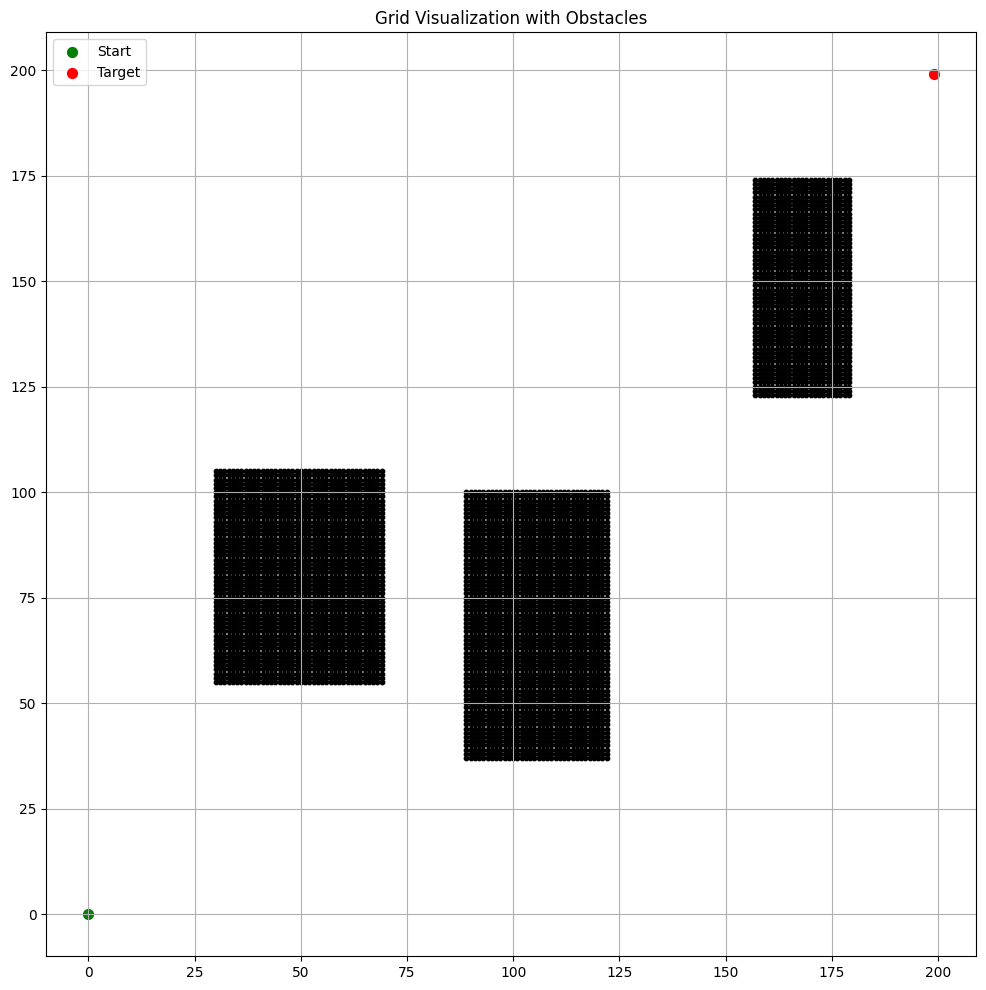

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Grid setup (same as your code)
grid = np.full((200,200), np.inf, dtype=np.float16)

# Obstacles
# grid[start_row:end_row, start_col,end_col]
# in 2D numpy array rows are y-axis points and columns are x-axis points
grid[55:106, 30:70] = -np.inf
grid[37:101, 89:123] = -np.inf
grid[123:175, 157:180] = -np.inf

origin = (0,0)
target = (199,199)
grid[origin] = 0

# Create a visualization array
vis_grid = np.zeros_like(grid)

# Mark obstacles as 1
vis_grid[grid == -np.inf] = 1
obstacles_y, obstacles_x = np.where(vis_grid == 1)
# Plot
plt.figure(figsize=(12,12))
plt.grid(True)

# Mark start and target
plt.scatter(obstacles_x, obstacles_y, c='black', s=10)
plt.scatter(origin[1], origin[0], c='green', s=50, label='Start')  # NOTE: x=j, y=i
plt.scatter(target[1], target[0], c='red', s=50, label='Target')

plt.title("Grid Visualization with Obstacles")
plt.legend()
plt.show()


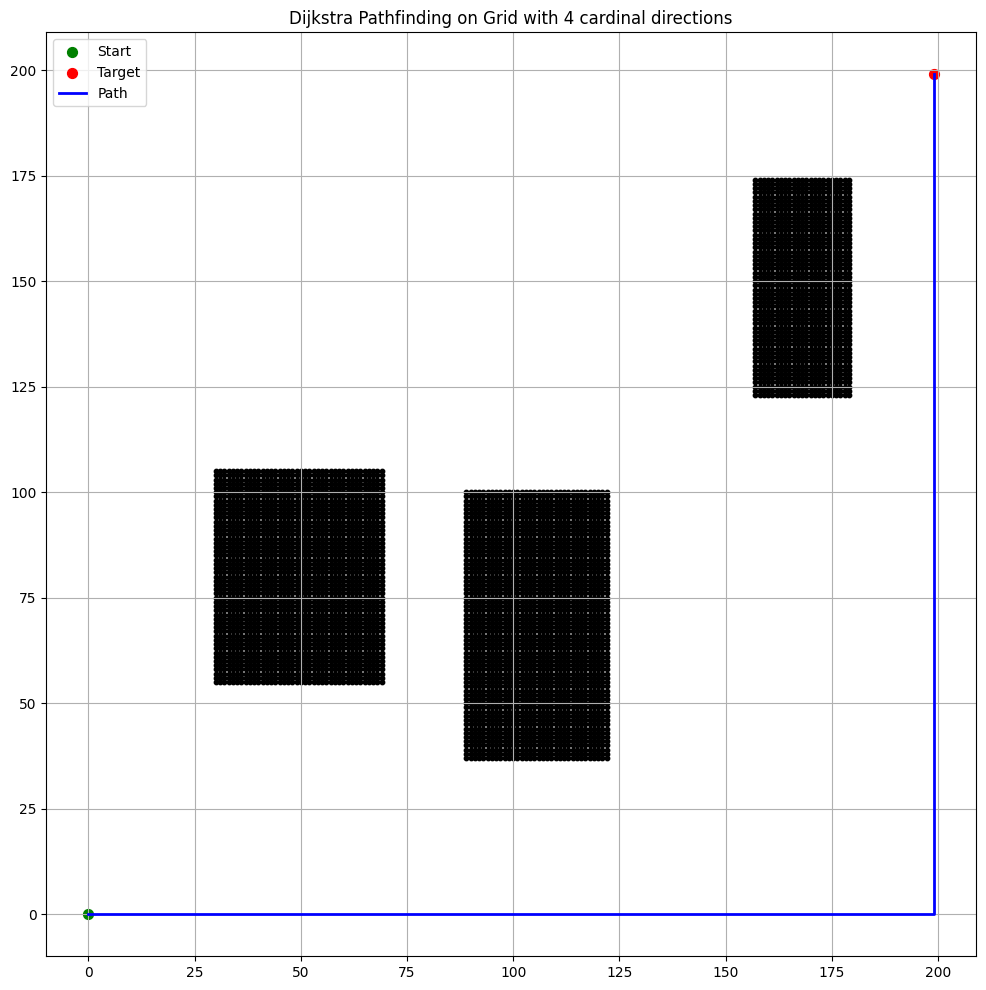

In [20]:
import heapq #contains in-built functions for easier implementation as it replaces the minDistance() function in above implementation to a more optimal one

dirs = [(-1,0),(1,0),(0,-1),(0,1)] # 4 cardinal directions

# Parent array for path reconstruction
parent = np.empty((200,200), dtype=object) # To store previously travelled cell for every cell
for i in range(200):
    for j in range(200):
        parent[i,j] = (i,j)


# this is the standard implementation of Dijkstra using high level functions, if you fully understood the algorithm theoretically its more than enough
# we'll just use the below code as a reference for other problems
def dijkstra(grid, origin, target):
    visited = np.full(grid.shape, False)
    pq = []  # priority queue as min-heap
    heapq.heappush(pq, (0, origin))  # (cost, (i,j))

    while pq:
        cost, (i,j) = heapq.heappop(pq)

        if visited[i,j]:
            continue
        visited[i,j] = True

        if (i,j) == target:
            break

        # Explore neighbors
        for di,dj in dirs:
            ni, nj = i+di, j+dj
            if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                if grid[ni,nj] != -np.inf and not visited[ni,nj]:
                    new_cost = cost + 1  # all moves cost 1
                    if new_cost < grid[ni,nj]:
                        grid[ni,nj] = new_cost
                        parent[ni,nj] = (i,j)
                        heapq.heappush(pq, (new_cost, (ni,nj)))
    return grid, parent

grid, parent = dijkstra(grid, origin, target)

path = []
cell = target
while cell != origin:
    path.append(cell)
    cell = parent[cell]
path.append(origin)
path.reverse()

vis_grid = np.zeros_like(grid)
vis_grid[grid == -np.inf] = 1
obstacles_y, obstacles_x = np.where(vis_grid == 1)

plt.figure(figsize=(12,12))
plt.grid(True)
plt.scatter(obstacles_x, obstacles_y, c='black', s=10)
plt.scatter(origin[1], origin[0], c='green', s=50, label='Start')
plt.scatter(target[1], target[0], c='red', s=50, label='Target')

# Plot path
path_y = [p[0] for p in path]
path_x = [p[1] for p in path]
plt.plot(path_x, path_y, c='blue', linewidth=2, label='Path')

plt.title("Dijkstra Pathfinding on Grid with 4 cardinal directions")
plt.legend()
plt.show()

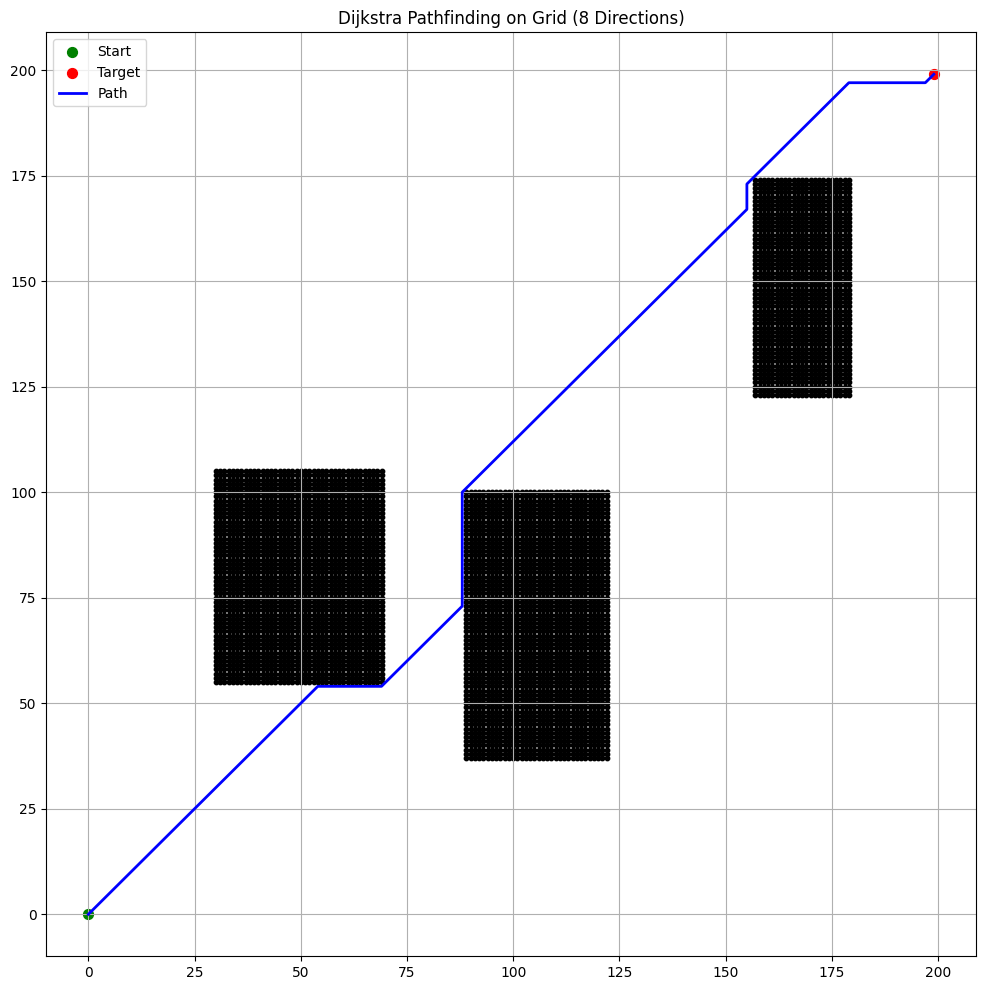

In [21]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# 8 directions: N, S, W, E, NW, NE, SW, SE
dirs = [(-1,0),(1,0),(0,-1),(0,1), (-1,-1), (-1,1), (1,-1), (1,1)]
# Corresponding costs for moves (1 for cardinal, sqrt(2) for diagonals)
costs = [1,1,1,1, np.sqrt(2), np.sqrt(2), np.sqrt(2), np.sqrt(2)]

# Parent array for path reconstruction
parent = np.empty((200,200), dtype=object)
for i in range(200):
    for j in range(200):
        parent[i,j] = (i,j)

def dijkstra_8dir(grid, origin, target):
    visited = np.full(grid.shape, False)
    pq = []  # priority queue as min-heap
    heapq.heappush(pq, (0, origin))  # (cost, (i,j))

    while pq:
        cost, (i,j) = heapq.heappop(pq)

        if visited[i,j]:
            continue
        visited[i,j] = True

        if (i,j) == target:
            break

        # Explore neighbors
        for (di,dj), move_cost in zip(dirs, costs):
            ni, nj = i+di, j+dj
            if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                if grid[ni,nj] != -np.inf and not visited[ni,nj]:
                    new_cost = cost + move_cost
                    if new_cost < grid[ni,nj]:
                        grid[ni,nj] = new_cost
                        parent[ni,nj] = (i,j)
                        heapq.heappush(pq, (new_cost, (ni,nj)))
    return grid, parent

# Example usage
grid_copy = np.copy(grid)  # Keep original grid intact
grid_copy, parent = dijkstra_8dir(grid_copy, origin, target)

# Reconstruct path
path = []
cell = target
while cell != origin:
    path.append(cell)
    cell = parent[cell]
path.append(origin)
path.reverse()

# Visualization
vis_grid = np.zeros_like(grid_copy)
vis_grid[grid_copy == -np.inf] = 1
obstacles_y, obstacles_x = np.where(vis_grid == 1)

plt.figure(figsize=(12,12))
plt.grid(True)
plt.scatter(obstacles_x, obstacles_y, c='black', s=10)
plt.scatter(origin[1], origin[0], c='green', s=50, label='Start')
plt.scatter(target[1], target[0], c='red', s=50, label='Target')

path_y = [p[0] for p in path] # as in numpy rows are y - axis
path_x = [p[1] for p in path] # columns are x - axis
plt.plot(path_x, path_y, c='blue', linewidth=2, label='Path')

plt.title("Dijkstra Pathfinding on Grid (8 Directions)")
plt.legend()
plt.show()

In [22]:
distance = grid_copy[target]
print("Dijkstra shortest path distance:", distance)

Dijkstra shortest path distance: 300.8


In [23]:
def path_length(path):
    dist = 0
    for (i1,j1),(i2,j2) in zip(path[:-1], path[1:]):
        di, dj = abs(i2-i1), abs(j2-j1)
        dist += np.sqrt(2) if di==1 and dj==1 else 1
    return dist
# just checking stored path list is correct
print("Recovered path length:", path_length(path))
print("Dijkstra distance:", grid_copy[target]) # correct just an error of approximation

Recovered path length: 300.7594513539347
Dijkstra distance: 300.8


If you just observe the path traced by dijkstra and apply triangle inequality, You can identify that this is still not the shortest path in 2D space.(In 8 directional grid it is the shortest because of limited directions) The shortest path is the one that only changes its directions at the corners of obstacles.

Theorem : **The true shortest path around polygonal obstacles is a polyline whose vertices lie on obstacle corners.**

Its ONLY valid for polygons, for circles and other curves there's another way just think about it . . . . .
(tangents)

As you cen see in the plot below, that the shortest path distance is 287.7 approx where distance calculated by dijkstra with 8 directions was near 300.

287.6642403273417


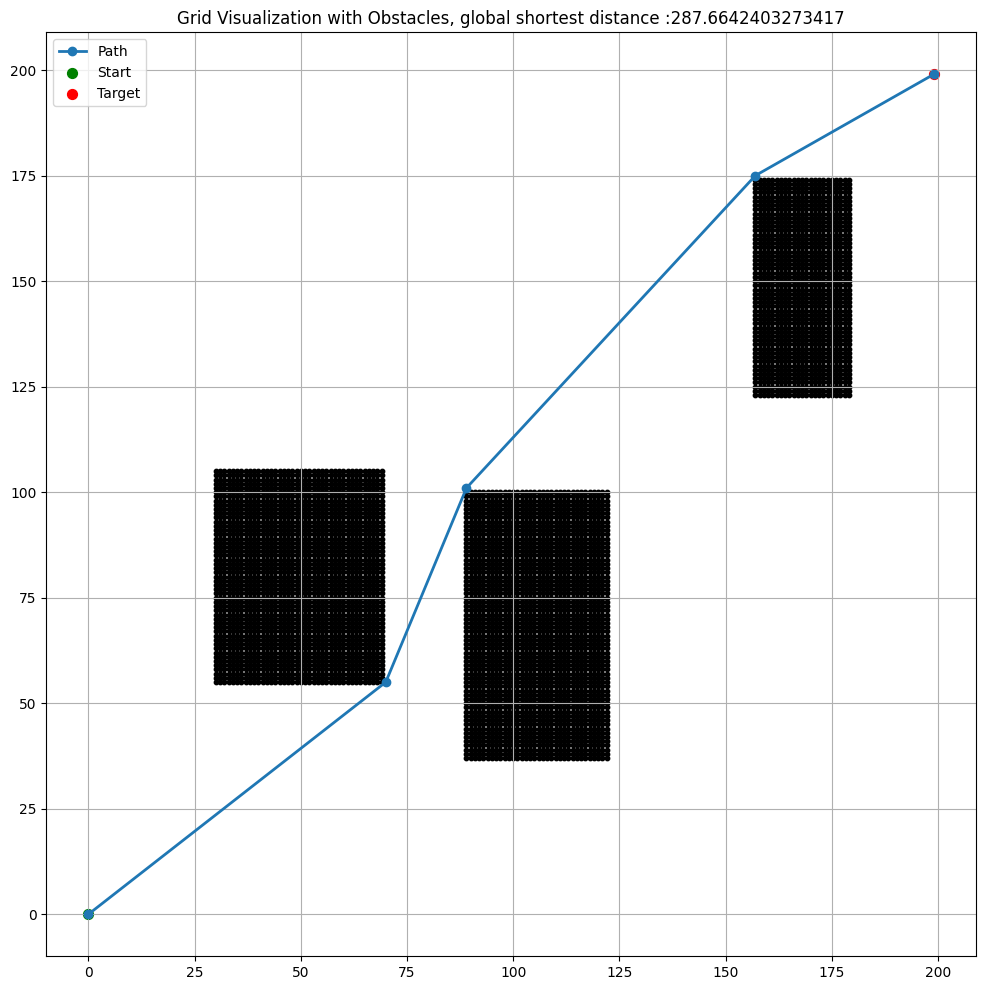

In [24]:
path = [
    (0, 0),
    (55, 70),
    (101, 89),
    (175, 157),
    (199, 199)
]
shortest_distance = 0
for i in range(len(path) - 1):
    r1, c1 = path[i]
    r2, c2 = path[i + 1]
    shortest_distance += np.sqrt((r2 - r1)**2 + (c2 - c1)**2)
print(shortest_distance)
# Convert to x, y for plotting (x = col, y = row)
path_y = [p[0] for p in path]
path_x = [p[1] for p in path]

# Grid setup (same as your code)
grid = np.full((200,200), np.inf, dtype=np.float16)

# Obstacles
# grid[start_row:end_row, start_col,end_col]
# in 2D numpy array rows are y-axis points and columns are x-axis points
grid[55:106, 30:70] = -np.inf
grid[37:101, 89:123] = -np.inf
grid[123:175, 157:180] = -np.inf

origin = (0,0)
target = (199,199)
grid[origin] = 0

# Create a visualization array
vis_grid = np.zeros_like(grid)

# Mark obstacles as 1
vis_grid[grid == -np.inf] = 1
obstacles_y, obstacles_x = np.where(vis_grid == 1)
# Plot
plt.figure(figsize=(12,12))
plt.grid(True)

# Mark start and target
plt.plot(path_x, path_y, linewidth=2, marker='o', label='Path')
plt.scatter(obstacles_x, obstacles_y, c='black', s=10)
plt.scatter(origin[1], origin[0], c='green', s=50, label='Start')  # NOTE: x=j, y=i
plt.scatter(target[1], target[0], c='red', s=50, label='Target')

plt.title("Grid Visualization with Obstacles, global shortest distance :" + str(shortest_distance))
plt.legend()
plt.show()


To implement this we can use a **visibility graph** (A graph that connects points if a direct line of sight exists between them without intersecting obstacles)

**If the shortest path bends, it bends only at obstacle corners**

So, our entire grid is reduced to a simple graph which consists of origin, target and corner points of obstacles which are in line of sight either to origin or target or other corners.

We will focus mostly on grid based search for now, if time permits we can delve deeper to calculate global optimal path in 2D space

#Extra Note : The more directions you add , the more the closer the path found by dijkstra tends to 2-D optimum

Same code as above but more directions

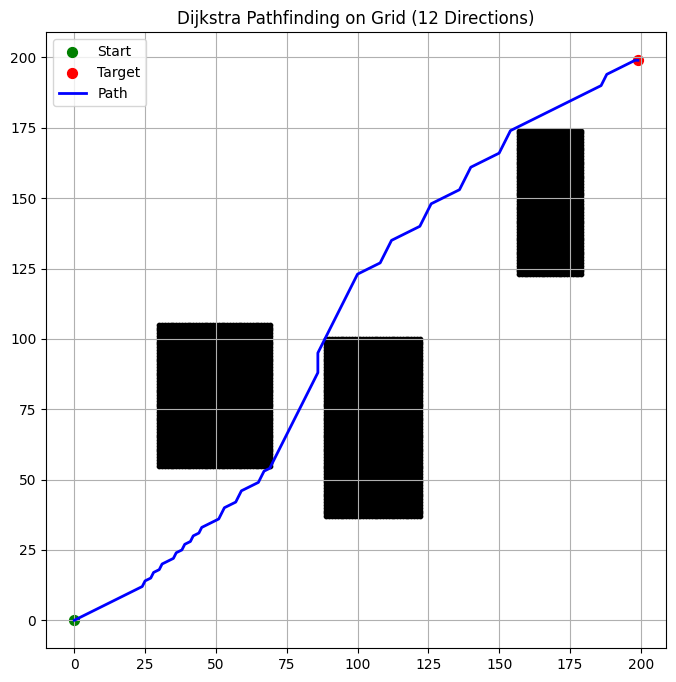

In [34]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# 12 directions approximating a unit circle (30° spacing)
dirs = [
    (-1, 0), (1, 0), (0, -1), (0, 1),      # cardinal
    (-1, 2), (-2, 1), (-2, -1), (-1, -2),  # diagonals (30°, 60° etc.)
    (1, -2), (2, -1), (2, 1), (1, 2)
]

# Exact Euclidean costs
costs = [
    1, 1, 1, 1,
    np.sqrt(5), np.sqrt(5), np.sqrt(5), np.sqrt(5),
    np.sqrt(5), np.sqrt(5), np.sqrt(5), np.sqrt(5)
]


# Parent array for path reconstruction
parent = np.empty((200,200), dtype=object)
for i in range(200):
    for j in range(200):
        parent[i,j] = (i,j)

def dijkstra_8dir(grid, origin, target):
    visited = np.full(grid.shape, False)
    pq = []  # priority queue as min-heap
    heapq.heappush(pq, (0, origin))  # (cost, (i,j))

    while pq:
        cost, (i,j) = heapq.heappop(pq)

        if visited[i,j]:
            continue
        visited[i,j] = True

        if (i,j) == target:
            break

        # Explore neighbors
        for (di,dj), move_cost in zip(dirs, costs):
            ni, nj = i+di, j+dj
            if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                if grid[ni,nj] != -np.inf and not visited[ni,nj]:
                    new_cost = cost + move_cost
                    if new_cost < grid[ni,nj]:
                        grid[ni,nj] = new_cost
                        parent[ni,nj] = (i,j)
                        heapq.heappush(pq, (new_cost, (ni,nj)))
    return grid, parent

# Example usage
grid_copy = np.copy(grid)  # Keep original grid intact
grid_copy, parent = dijkstra_8dir(grid_copy, origin, target)

# Reconstruct path
path = []
cell = target
while cell != origin:
    path.append(cell)
    cell = parent[cell]
path.append(origin)
path.reverse()

# Visualization
vis_grid = np.zeros_like(grid_copy)
vis_grid[grid_copy == -np.inf] = 1
obstacles_y, obstacles_x = np.where(vis_grid == 1)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.scatter(obstacles_x, obstacles_y, c='black', s=10)
plt.scatter(origin[1], origin[0], c='green', s=50, label='Start')
plt.scatter(target[1], target[0], c='red', s=50, label='Target')

path_y = [p[0] for p in path] # as in numpy rows are y - axis
path_x = [p[1] for p in path] # columns are x - axis
plt.plot(path_x, path_y, c='blue', linewidth=2, label='Path')

plt.title("Dijkstra Pathfinding on Grid (12 Directions)")
plt.legend()
plt.show()

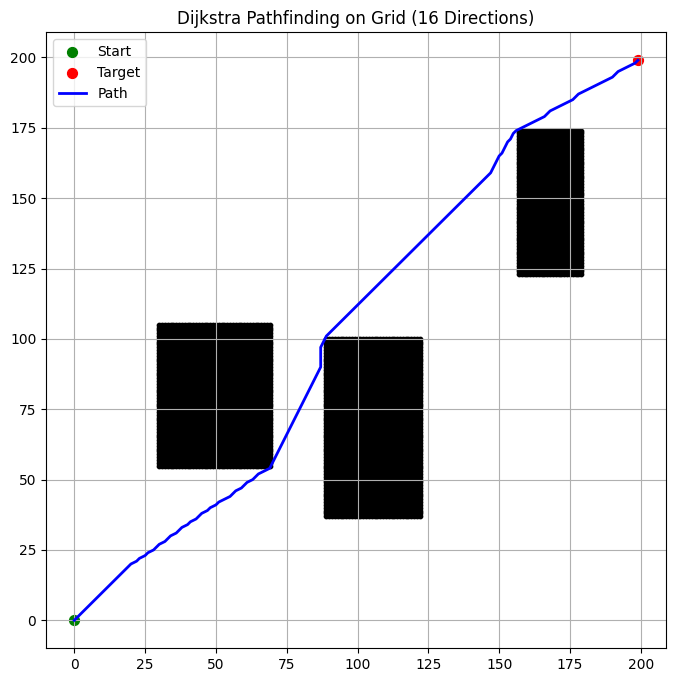

In [35]:
# 16 directions (~22.5° spacing)
dirs = [
    (-1, 0), (1, 0), (0, -1), (0, 1),      # 0°, 90°, 180°, 270°
    (-1, -1), (-1, 1), (1, -1), (1, 1),    # 45° diagonals
    (-1, 2), (-2, 1), (-2, -1), (-1, -2),  # 22.5°, 67.5°, etc.
    (1, -2), (2, -1), (2, 1), (1, 2)
]

# Exact Euclidean distances
costs = [
    1, 1, 1, 1,
    np.sqrt(2), np.sqrt(2), np.sqrt(2), np.sqrt(2),
    np.sqrt(5), np.sqrt(5), np.sqrt(5), np.sqrt(5),
    np.sqrt(5), np.sqrt(5), np.sqrt(5), np.sqrt(5)
]

# Parent array for path reconstruction
parent = np.empty((200,200), dtype=object)
for i in range(200):
    for j in range(200):
        parent[i,j] = (i,j)

def dijkstra_8dir(grid, origin, target):
    visited = np.full(grid.shape, False)
    pq = []  # priority queue as min-heap
    heapq.heappush(pq, (0, origin))  # (cost, (i,j))

    while pq:
        cost, (i,j) = heapq.heappop(pq)

        if visited[i,j]:
            continue
        visited[i,j] = True

        if (i,j) == target:
            break

        # Explore neighbors
        for (di,dj), move_cost in zip(dirs, costs):
            ni, nj = i+di, j+dj
            if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                if grid[ni,nj] != -np.inf and not visited[ni,nj]:
                    new_cost = cost + move_cost
                    if new_cost < grid[ni,nj]:
                        grid[ni,nj] = new_cost
                        parent[ni,nj] = (i,j)
                        heapq.heappush(pq, (new_cost, (ni,nj)))
    return grid, parent

# Example usage
grid_copy = np.copy(grid)  # Keep original grid intact
grid_copy, parent = dijkstra_8dir(grid_copy, origin, target)

# Reconstruct path
path = []
cell = target
while cell != origin:
    path.append(cell)
    cell = parent[cell]
path.append(origin)
path.reverse()

# Visualization
vis_grid = np.zeros_like(grid_copy)
vis_grid[grid_copy == -np.inf] = 1
obstacles_y, obstacles_x = np.where(vis_grid == 1)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.scatter(obstacles_x, obstacles_y, c='black', s=10)
plt.scatter(origin[1], origin[0], c='green', s=50, label='Start')
plt.scatter(target[1], target[0], c='red', s=50, label='Target')

path_y = [p[0] for p in path] # as in numpy rows are y - axis
path_x = [p[1] for p in path] # columns are x - axis
plt.plot(path_x, path_y, c='blue', linewidth=2, label='Path')

plt.title("Dijkstra Pathfinding on Grid (16 Directions)")
plt.legend()
plt.show()